# Data frames manipulation with pandas

[pandas](https://pandas.pydata.org/) -  fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

----------------


In [2]:
## Load libraries
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load & plot confounds variables 

**Confounds** (or *nuisance regressors*) are variables representing fluctuations with a potential non-neuronal origin. 

Confounding variables calculated by [fMRIPrep](https://fmriprep.readthedocs.io/en/stable/outputs.html#confounds) are stored separately for each subject, session and run in TSV files - one column for each confound variable. 

In [5]:
# Load data

confounds_path = "data/sub-01_ses-1_task-rest_bold_confounds.tsv"
confounds = pd.read_csv(confounds_path, delimiter="\t")

# Print first 5 rows of data
confounds.head()

,CSF,WhiteMatter,GlobalSignal,stdDVARS,non-stdDVARS,vx-wisestdDVARS,FramewiseDisplacement,tCompCor00,tCompCor01,tCompCor02,...,AROMAAggrComp29,AROMAAggrComp35,AROMAAggrComp36,AROMAAggrComp42,AROMAAggrComp45,AROMAAggrComp46,AROMAAggrComp50,AROMAAggrComp51,AROMAAggrComp53,AROMAAggrComp54
0,4715.346067,4909.426273,4862.612041,NaN,NaN,NaN,NaN,-0.059217,0.062892,-0.013710,...,1.062466,-1.569555,1.346532,-1.293528,-0.519630,-0.242345,-0.885939,-0.933226,0.079566,-0.261299
1,4717.920970,4900.866223,4853.728164,0.943263,15.010096,0.864449,0.079526,0.006799,0.039018,-0.022991,...,-0.289283,-0.822666,1.080866,0.765488,-1.162383,0.196090,-0.770284,-0.441885,-0.098900,0.525687
2,4725.817590,4907.646585,4860.376132,1.103134,17.554121,0.925185,0.090839,0.052704,-0.009987,0.123641,...,-0.841782,-1.616199,0.853288,-1.369633,-0.219267,-0.840327,0.293680,-1.459476,-2.189689,-0.283386
3,4716.867299,4907.365030,4852.321888,1.123165,17.872868,0.929857,0.088307,0.021223,-0.018306,0.113884,...,0.644177,-1.817780,1.318560,0.058877,-2.458908,-1.961658,-1.967909,-2.838033,0.913620,1.216556
4,4696.405244,4906.668756,4846.569808,1.056746,16.815956,0.946065,0.093996,-0.098909,0.000380,-0.024023,...,0.393395,-0.643666,0.644899,0.273928,0.031010,-0.709323,-0.322162,-0.922096,0.527810,0.738223


In [6]:
# Print column names

print(confounds.columns)

Index(['CSF', 'WhiteMatter', 'GlobalSignal', 'stdDVARS', 'non-stdDVARS',
       'vx-wisestdDVARS', 'FramewiseDisplacement', 'tCompCor00', 'tCompCor01',
       'tCompCor02', 'tCompCor03', 'tCompCor04', 'tCompCor05', 'aCompCor00',
       'aCompCor01', 'aCompCor02', 'aCompCor03', 'aCompCor04', 'aCompCor05',
       'Cosine00', 'Cosine01', 'Cosine02', 'Cosine03', 'Cosine04', 'Cosine05',
       'Cosine06', 'Cosine07', 'X', 'Y', 'Z', 'RotX', 'RotY', 'RotZ',
       'AROMAAggrComp03', 'AROMAAggrComp10', 'AROMAAggrComp12',
       'AROMAAggrComp14', 'AROMAAggrComp19', 'AROMAAggrComp20',
       'AROMAAggrComp25', 'AROMAAggrComp29', 'AROMAAggrComp35',
       'AROMAAggrComp36', 'AROMAAggrComp42', 'AROMAAggrComp45',
       'AROMAAggrComp46', 'AROMAAggrComp50', 'AROMAAggrComp51',
       'AROMAAggrComp53', 'AROMAAggrComp54'],
      dtype='object')


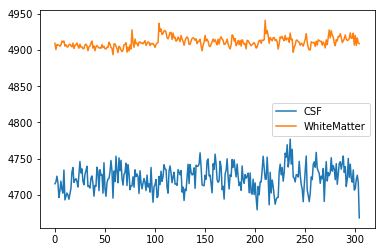

In [9]:
# Plot mean timeseries from cerebrospinal fluid (CSF) and white matter 

plt.plot(confounds["CSF"])
plt.plot(confounds["WhiteMatter"])
plt.legend(["CSF", "WhiteMatter"])

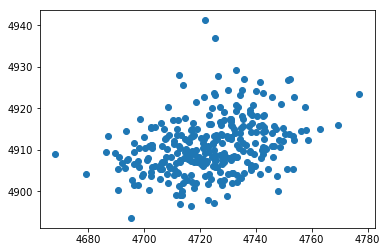

In [10]:
# Plot cerebrospinal fluid (CSF) and white matter timeseries on a scatterplot

plt.scatter(confounds["CSF"], confounds["WhiteMatter"])

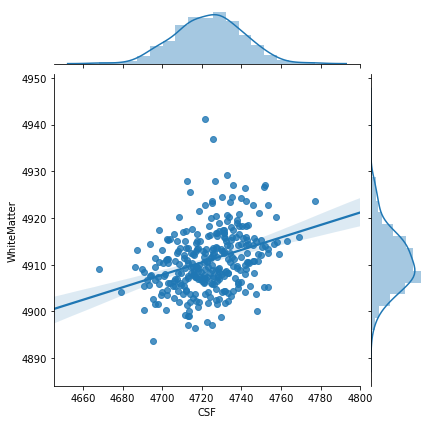

In [12]:
# Plot cerebrospinal fluid (CSF) and white matter timeseries on a scatterplot (use seaborn joint plot)
import seaborn as sns

sns.jointplot(confounds["CSF"], confounds["WhiteMatter"], kind="reg")

## 2. Load and plot COVID-19 data

Download data:
[COVID-19](http://shinyapps.org/apps/corona/) (check out their GH)

In [14]:
# Load some COVID-19 data
covid_path = "data/CSSE_confirmed_2020-03-26.csv"
covid = pd.read_csv(covid_path)

# Print first 5 rows of data
covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,21,22,22,22,24,24,40,40,74,84
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,51,55,59,64,70,76,89,104,123,146
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,54,60,74,87,90,139,201,230,264,302
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,2,39,39,53,75,88,113,133,164,188
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,1,2,2,3,3,3


In [16]:
# Group by country & sum cases
covid_grouped = covid.groupby("Country/Region").sum()
covid_grouped.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,21,22,22,22,24,24,40,40,74,84
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,51,55,59,64,70,76,89,104,123,146
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,54,60,74,87,90,139,201,230,264,302
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,2,39,39,53,75,88,113,133,164,188
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2,2,3,3,3


In [20]:
# Filter dataframe by cases in Poland
poland = covid_grouped.loc["Poland"].values[2:]
print(poland)

[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.000e+00 1.000e+00 5.000e+00 5.000e+00 1.100e+01 1.600e+01 2.200e+01
 3.100e+01 4.900e+01 6.800e+01 1.030e+02 1.190e+02 1.770e+02 2.380e+02
 2.510e+02 3.550e+02 4.250e+02 5.360e+02 6.340e+02 7.490e+02 9.010e+02
 1.051e+03]


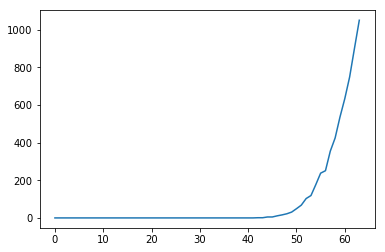

In [21]:
# Plot cases in Poland
plt.plot(poland)


In [22]:
# Plot cases in other country
spain = covid_grouped.loc["Spain"].values[2:]
print(spain)


[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 2.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00
 2.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00
 2.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00 6.0000e+00 1.3000e+01
 1.5000e+01 3.2000e+01 4.5000e+01 8.4000e+01 1.2000e+02 1.6500e+02
 2.2200e+02 2.5900e+02 4.0000e+02 5.0000e+02 6.7300e+02 1.0730e+03
 1.6950e+03 2.2770e+03 2.2770e+03 5.2320e+03 6.3910e+03 7.7980e+03
 9.9420e+03 1.1748e+04 1.3910e+04 1.7963e+04 2.0410e+04 2.5374e+04
 2.8768e+04 3.5136e+04 3.9885e+04 4.9515e+04]


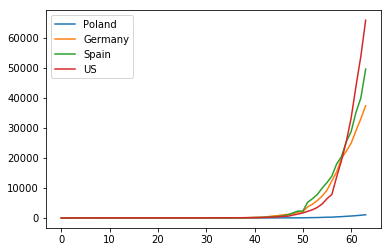

In [26]:
# Plot cases of multiple countries on a one plot (loop)

countries = ["Poland", "Germany", "Spain", "US"]

for country in countries:
    cases = covid_grouped.loc[country].values[2:]
    plt.plot(cases)
plt.legend(countries)

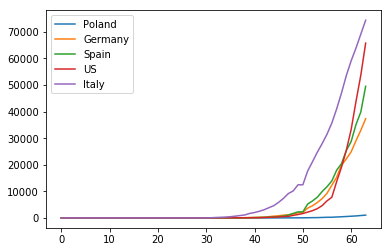

In [28]:
# Function example

def plot_cases_by_country(data, countries=[]):
    for country in countries:
        cases = data.loc[country].values[2:]
        plt.plot(cases)
    plt.legend(countries)
    
    
plot_cases_by_country(covid_grouped, countries=["Poland", "Germany", "Spain", "US", "Italy"])